#### Preparing the data

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred
sns.set

#Initializing fredapi
fred = Fred(api_key = 'f7a64d5acdc11f5d761fe5d9c28ca5fa')
series_ids =['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', \
              'DGS7', 'DGS10', 'DGS20', 'DGS30']
#Creating Function
def get_yield_data(series_id, start, end):
    data = Fred.get(series_id, observation_start = start, observation_end = end)
    return data
#creating dictionary of the series
start = "2001-01-01"
end = "2024-12-31"
yields_dict = {series_id: get_series_data(series_id, start, end) for series_id in series_ids}
#creating data frame
yields_df = pd.DataFrame(yields_dict)
#renaming columns
yields_df.columns = ['1month', '3month', '6month', '1year', '2year', '3year', '5year', '7year', '10year', '20year', '30year']
yields_df.head()

,1month,3month,6month,1year,2year,3year,5year,7year,10year,20year,30year
2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,NaN,5.87,5.58,5.11,4.87,4.82,4.76,4.97,4.92,5.46,5.35
2001-01-03,NaN,5.69,5.44,5.04,4.92,4.92,4.94,5.18,5.14,5.62,5.49
2001-01-04,NaN,5.37,5.20,4.82,4.77,4.78,4.82,5.07,5.03,5.56,5.44
2001-01-05,NaN,5.12,4.98,4.60,4.56,4.57,4.66,4.93,4.93,5.50,5.41


#### Drawing the yield curve

In [42]:
def plot_yield_curve(date):
    maturities = ['1month', '3months', '6months', '1year', '2years', '3years', '5years', '7years', '10years', '20years', '30years']
    fig, ax = plt.subplots(figsize = (12,6))
    ax.plot(maturities, yields_df.loc[date], marker = 'D', label = date + "yield curve")
    ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])
    ax.set_xticks(range(len(maturities)))
    ax.set_xticklabels(maturities)
    #Adding labels and title
    ax.set_xlabel('Maturity')
    ax.set_ylabel('yield')
    ax.set_title('Treasury yield curve for'  + date)
    fig.legend(loc= [0.69, 0.14])
    #showing the plot
    plt.grid(True)
    plt.show()

#### Calling the function

C:\Users\HIMS\AppData\Local\Temp\ipykernel_10328\2263051196.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


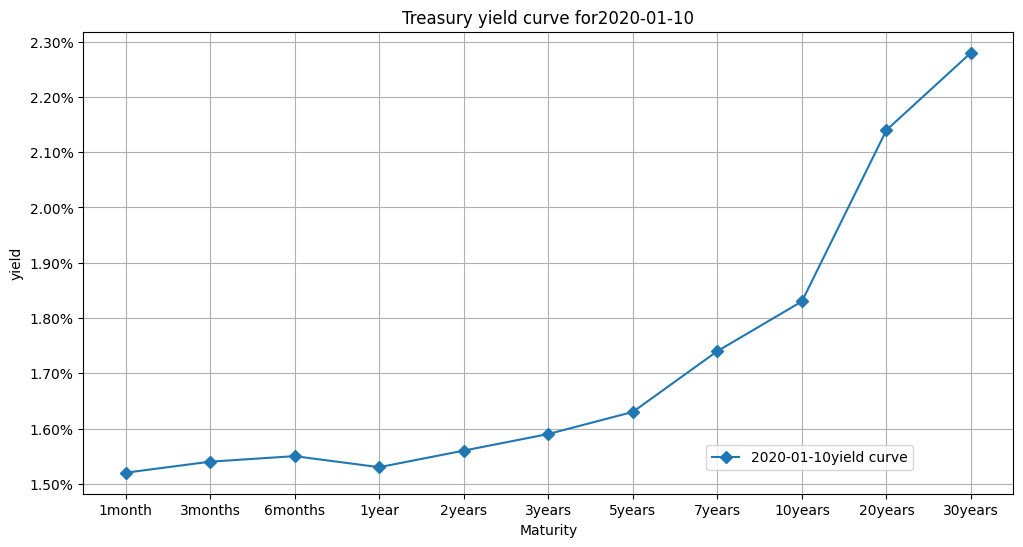

In [43]:
plot_yield_curve('2020-01-10')